<a href="https://colab.research.google.com/github/Maheshkumar145/DL_Theory/blob/main/DL_Assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.	What are the advantages of a CNN over a fully connected DNN for image classification?**

**Ans:**

* CNN has fewer parameters,so faster to train.It uses Reuse kernel which can detect feature anywhere.

* Architecture embeds knowledge of neighboring pixels.

* Because consecutive layers are only partially connected and because it heavily reuses its weights, a CNN has many fewer parameters than a fully connected DNN, which makes it much faster to train, reduces the risk of overfitting, and requires much less training data.

* When a CNN has learned a kernel that can detect a particular feature, it can detect that feature anywhere on the image. In contrast, when a DNN learns a feature in one location, it can detect it only in that particular location. Since images typically have very repetitive features, CNNs are able to generalize much better than DNNs for image processing tasks such as classification, using fewer training examples.

* Finally, a DNN has no prior knowledge of how pixels are organized; it does not know that nearby pixels are close. A CNN's architecture embeds this prior knowledge. Lower layers typically identify features in small areas of the images, while higher layers combine the lower-level features into larger features. This works well with most natural images, giving CNNs a decisive head start compared to DNNs.

**2.	Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels.**
**What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much RAM will this network require when making a prediction for a single instance? What about when training on a mini-batch of 50 images?**

**Ans:**
* first convolutional layer: 3 * 3 * 3 + 1 = 28 output feature maps is 100: 28 100 = 2800

* second convolutional layer kernel-size and last feature maps, plus bias: 3 * 3  * 100 + 1 = 901 output feature maps is 200: 901 * 200 = 180200

* third convolutional layers kernel-size and last feautre maps, plus bias: 3 * 3 * 200 + 1 =1801 output feautre maps is 400: 1801 * 400 = 720400

* Total parameters is 2800 + 180200 + 720400 = 903400

* 903400 * 4 / 1024 / 1024 = **3.44 (MB)** 

**memories since 32-bit is 4 bytes**

* first convolutional layer one feature map size: 100 * 150 = 15000 total output: 15000 * 100 = 1,500,000 

* second convolutional layer one feature map size: 50 * 75 = 3,750 total output: 3750 * 200 = 750,000

* third convolutional layer one feature map size: 25 * 38 = 950 total ouput: 950 * 400 = 380, 000

* (1,500,000 + 750,000 + 380,000) * 4 / 1024 /1024 = **10.032 (MB)**

* Total: 10.032+ 3.44=13.47(MB)

**3.	If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?**

**Ans:**

* reduce mini-batch size
* reduce dimensionality using a larger stride in one or more layers
* remove one or more layers
* using 16-bits instead of 32-bit floats
*distributed the cnn across multiple devices

**4.	Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?**

**Ans:** Max pooling is a type of operation that is typically added to CNNs following individual convolutional layers. When added to a model, max pooling reduces the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer

**5.	When would you want to add a local response normalization layer?**

**Ans:**This layer is useful when we are dealing with ReLU neurons.Because ReLU neurons have unbounded activations and we need LRN to normalize that.

**6.	Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet, SENet, and Xception?**

**Ans:**
* AlexNet : It is much larger and deeper stacks convolutional layer directly on top of each convlutional layer.

* GooLeNet: Introduce a inception modules, which make it possible to have much deeper net than previous network.

* ResNet: Introduce a skip connection.


**7.	What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?**

**Ans:** Fully Convolutional Networks are an architecture used mainly for semantic segmentation. They employ solely locally connected layers, such as convolution, pooling and upsampling. Avoiding the use of dense layers means less parameters (making the networks faster to train).

If we set the kernel size to match the input size. Setting the number of filters is then the same as setting the number of output neurons in a fully connected layer.

**8.	What is the main technical difficulty of semantic segmentation?**

**Ans:** 
* It can only identify a single type of defect  
* It lack of pixel-level segmentation information from the model 

**9.	Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.**

In [ ]:
from keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


<function matplotlib.pyplot.show(*args, **kw)>

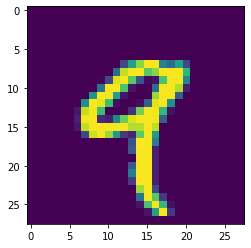

In [ ]:
plt.imshow(xtrain[4])
plt.show

In [ ]:
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [13]:
from keras.models import Sequential
model=Sequential()
     
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
     
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))
     
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
     
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))    

Epoch 1/5
600/600 [==============================] - 242s 396ms/step - loss: 0.1298 - accuracy: 0.9597 - val_loss: 0.0362 - val_accuracy: 0.9886
Epoch 2/5
600/600 [==============================] - 240s 400ms/step - loss: 0.0381 - accuracy: 0.9886 - val_loss: 0.0249 - val_accuracy: 0.9910
Epoch 3/5
600/600 [==============================] - 226s 376ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0244 - val_accuracy: 0.9912
Epoch 4/5
600/600 [==============================] - 220s 366ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 5/5
600/600 [==============================] - 223s 372ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0257 - val_accuracy: 0.9918


In [15]:
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

313/313 [==============================] - 11s 34ms/step - loss: 0.0257 - accuracy: 0.9918


([0.010635819286108017, 0.9966833591461182],
 [0.025650884956121445, 0.9918000102043152])